# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    if type(size) is int:
        binary_arr = 2.0 ** np.arange(-precision, 0)
        shape = (size, precision)
        bernoulli = coin(shape)
        shape = (size, 1)
        res = np.tile(binary_arr, shape)
        return np.sum(bernoulli * res, axis=1)
    elif type(size) is tuple:
        numbers = 2.0 ** np.arange(-precision, 0)
        shape = size + (precision,)
        bernoulli = coin(shape)
        shape = size + (1,)
        res = np.tile(numbers, shape)
        return np.sum(bernoulli * res, axis=len(size))
    
def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500)  # равномерная сетка от -0.25 до 1.25 из 500 точек
    plt.figure(figsize=(10, 5))
    x = uniform(size)

    plt.scatter(x=x, y=np.zeros(size), color='red', alpha=0.4, label='случайная величина')
    plt.hist(x, alpha=0.4, density=True, bins=10, label='Экспериментально вычисленная плотность')
    plt.plot(grid, uniform_pdf(grid), alpha=0.4, linewidth=5, label='Теоретически вычисленная плотность')

    plt.title('Равномерное распределение', fontsize=22)
    plt.xlabel('случайная величина', fontsize=16)
    plt.ylabel('Плотность', fontsize=16)

    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend()
    return plt.gcf()

def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15, 9))
    plt.suptitle('Выборки для разных точностей', fontsize=20)

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)

        plt.scatter(
           uniform(size, precision),
           np.zeros(size),
           alpha=0.4
        )

        plt.tick_params(axis='x', labelsize=15)
        plt.tick_params(axis='y', labelsize=15)

        plt.title('Precision = ' + str(precision), fontsize=15)
        plt.yticks(np.arange(-0.05, 0.1, step=0.1))
        if i < 4:
            plt.xticks(np.arange(0, 1, step=0.1))
        plt.xlabel('Значения выборки', fontsize=15)

    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    plt.tight_layout()
    return plt.gcf()

def normal(size=1, loc=0, scale=1, precision=30):
    distribution1 = uniform(size, precision)
    distribution2 = uniform(size, precision)
    z1 = np.sqrt(-2 * np.log(distribution1)) * np.cos(2 * np.pi * distribution2)
    x = loc + z1 * scale
    return x

def plot_normal_density(size=200):
    grid = np.linspace(-3, 3, 500)  # равномерная сетка от -0.25 до 1.25 из 500 точек
    plt.figure(figsize=(10, 5))
    x = normal(size)

    plt.scatter(x=x, y=np.zeros(size), color='red', alpha=0.4, label='случайная величина')
    plt.hist(x, alpha=0.4, density=True, bins=10, label='Экспериментально вычисленная плотность')
    plt.plot(grid, norm_pdf(grid), alpha=0.4, linewidth=5, label='Теоретически вычисленная плотность')

    plt.title('Нормальное распределение', fontsize=22)
    plt.xlabel('случайная величина', fontsize=16)
    plt.ylabel('Плотность', fontsize=16)

    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend()
    return plt.gcf()

def expon(size=1, lambd=1, precision=30):
    return -np.log(uniform(size, precision)) / lambd

def plot_expon_density(size=100):
    grid = np.linspace(-0.5, 5, 500)  # равномерная сетка от -0.25 до 1.25 из 500 точек
    plt.figure(figsize=(10, 5))
    x = expon(size)

    plt.scatter(x=x, y=np.zeros(size), color='red', alpha=0.4, label='случайная величина')
    plt.hist(x, alpha=0.4, density=True, bins=10, label='Экспериментально вычисленная плотность')
    plt.plot(grid, expon_pdf(grid), alpha=0.4, linewidth=5, label='Теоретически вычисленная плотность')

    plt.title('Экспонециальное распределение', fontsize=22)
    plt.xlabel('случайная величина', fontsize=16)
    plt.ylabel('Плотность', fontsize=16)

    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend()
    return plt.gcf()

Мы самостоятельно реализовали функции, генерирующие числа из равномерного, нормального и экспоненциального распределения. Для начала помотрим на графики и сравним их для равномерного распределения.

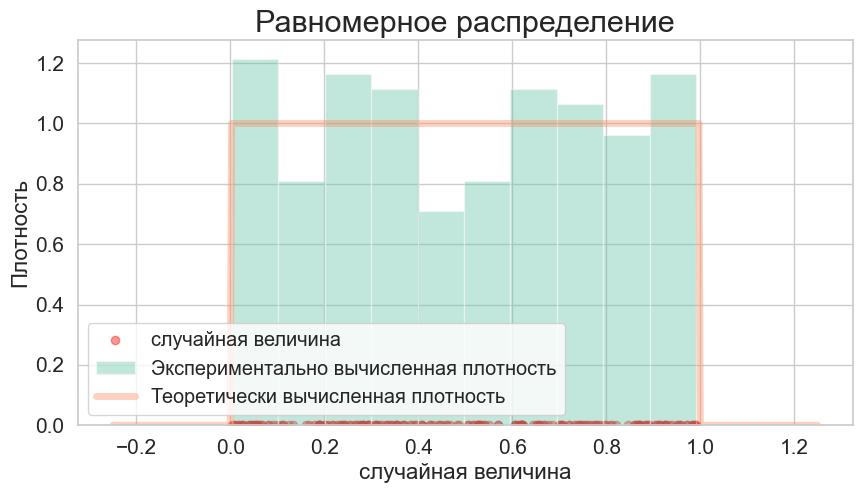

In [4]:
figure = plot_uniform_density()

Как видим теоретическая плотность, взятая из scipy.stats близка к эксперементальной. График действительно изображает гистаграмму равномерного распределения.

Теперь исследуем, как меняются значения случайных величин в зависимости от precision.

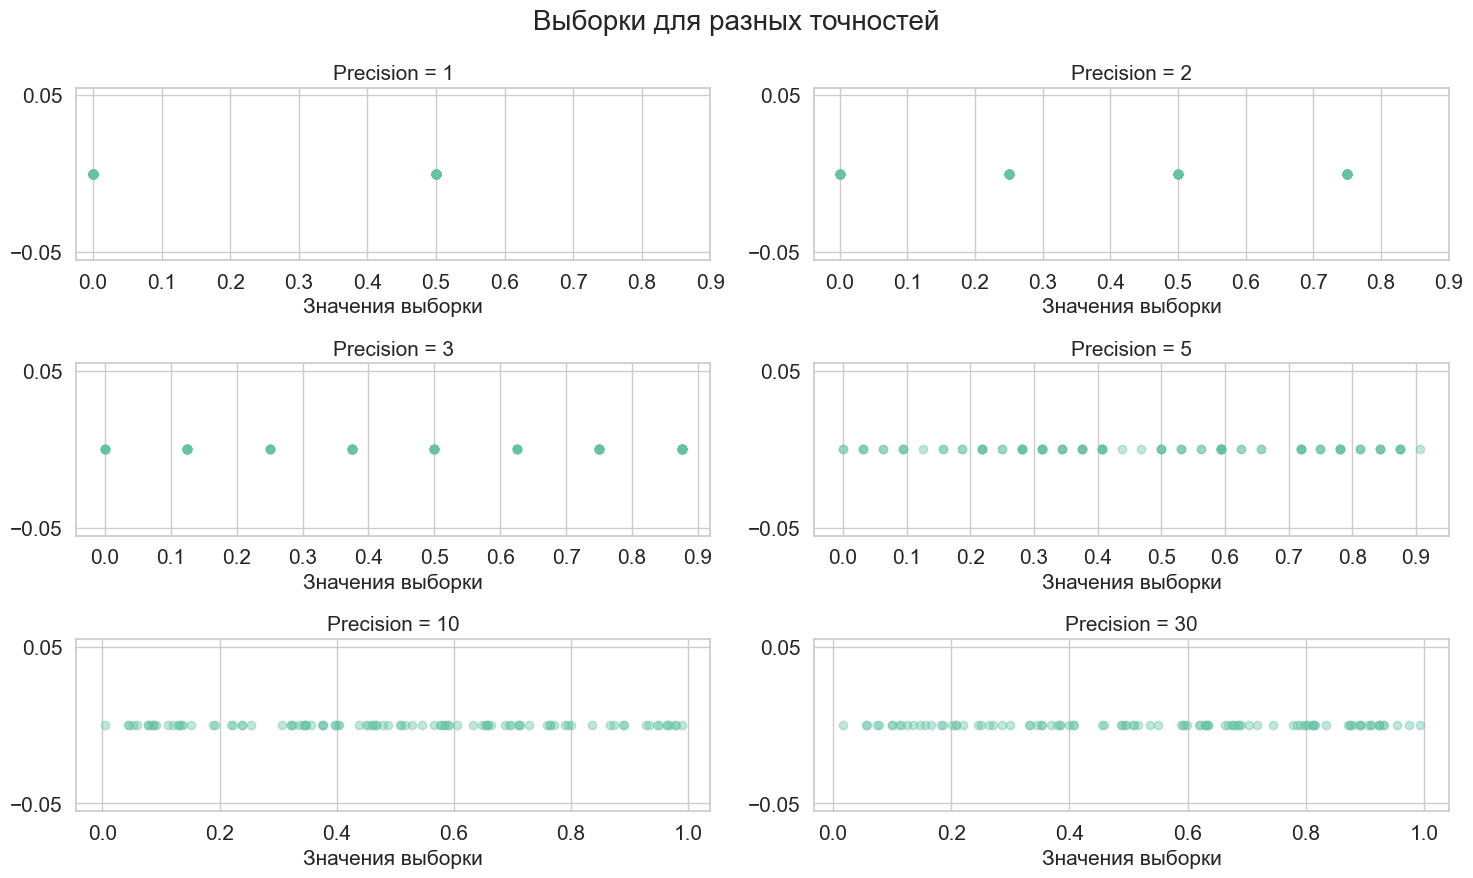

In [5]:
figure = plot_uniform_different_precision()

Как видим, чем больше значение precision, тем равномернее случайная величина распологается на отрезке [0, 1].

Реализовав с помощью преобразования Бокса-Мюллера нормальное распределение, посмотрим на сам график.

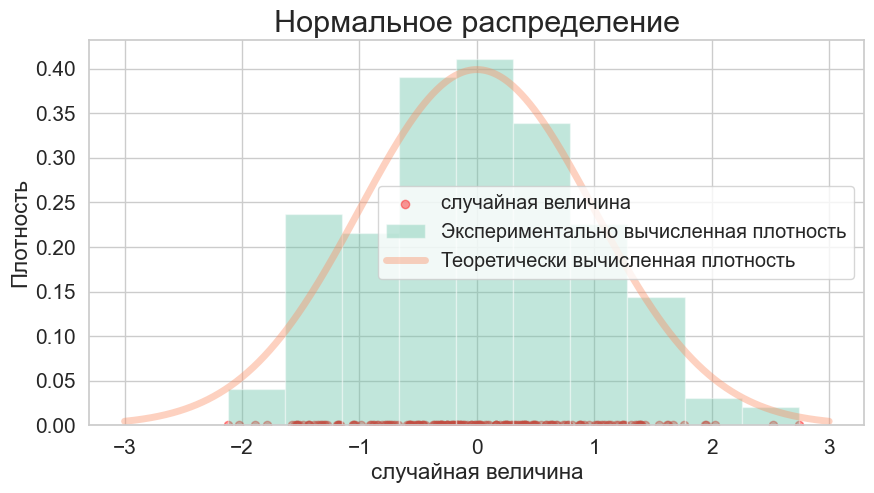

In [6]:
figure = plot_normal_density()

По графику заметно корректое вычисление плотности нормального распределения в зависимости от случайной величины.

Далее убедимся в корректности экспонециального распределения.

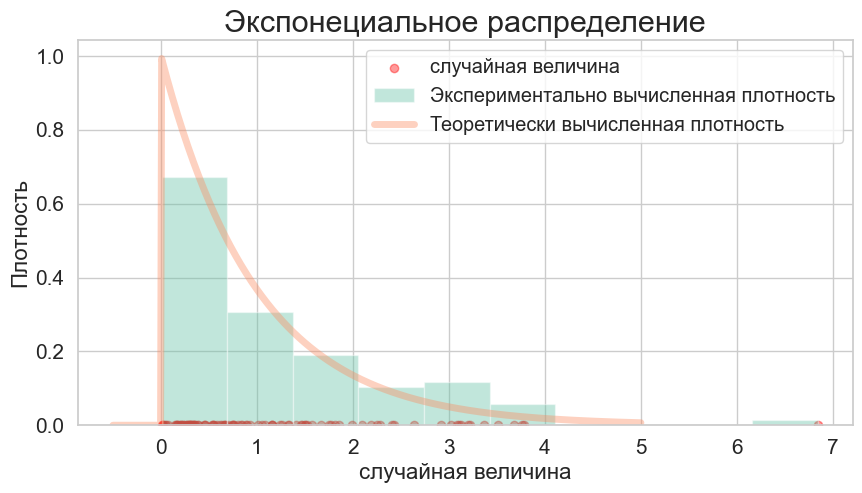

In [7]:
figure = plot_expon_density()

**Выводы:**

Теоретические распределения оказались близки к экспериментальным, что подтверждают графики. Равномерное, нормальное и экспонециальное распределения были вычислены корректно.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

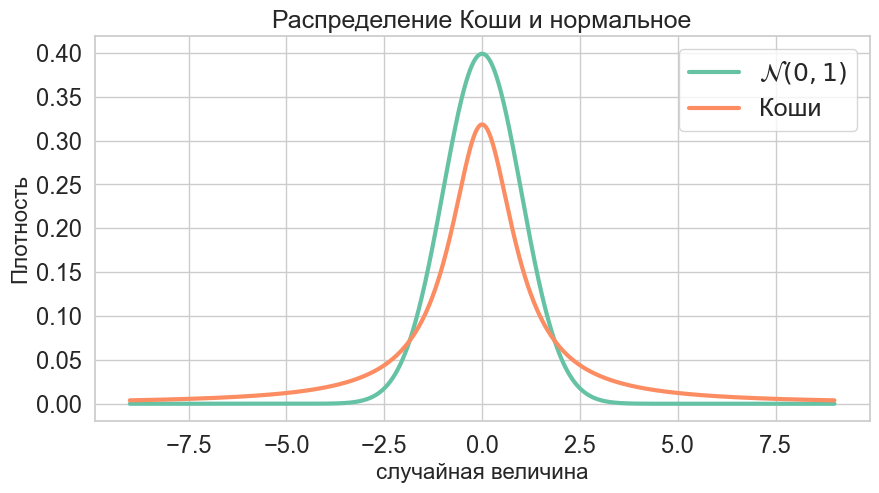

In [8]:
xmin = -9
xmax = 9
grid_size = 2000
grid = np.linspace(xmin, xmax, grid_size)
plt.figure(figsize=(10, 5))

plt.plot(grid, sps.norm.pdf(grid), label='$\mathcal{N}(0, 1)$', lw=3)
plt.plot(grid, sps.cauchy.pdf(grid), label='Коши', lw=3)

plt.xlabel('случайная величина', fontsize=16)
plt.ylabel('Плотность', fontsize=16)
plt.title('Распределение Коши и нормальное', fontsize=18)

plt.legend(fontsize=18)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Посмотрим, как будет вести себя значение среднего при увеличении количества случайных величин.

In [9]:
size = 1000  # количество случайных величин
samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

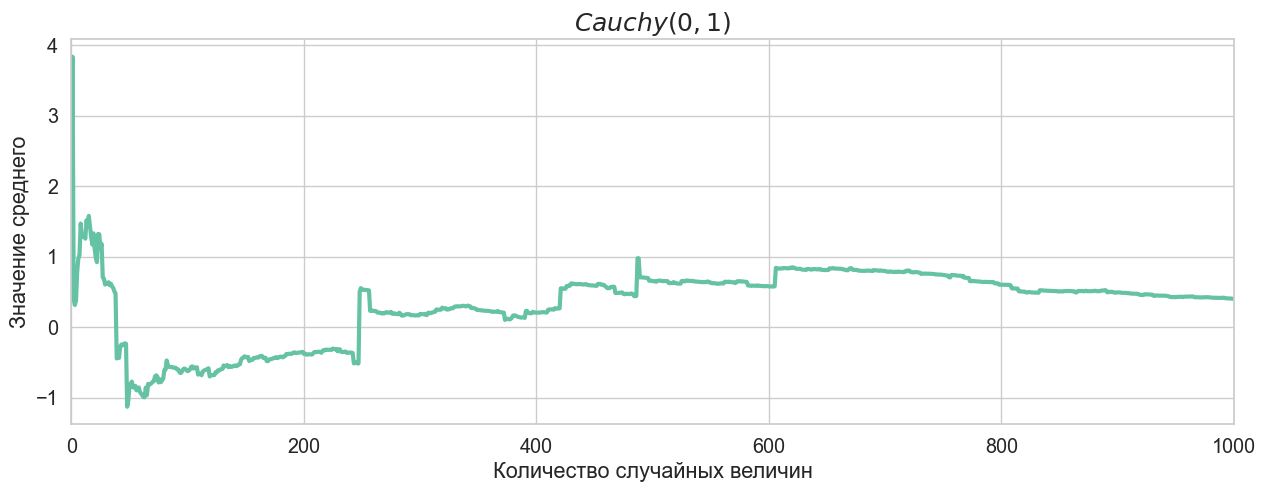

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('$Cauchy(0, 1)$', fontsize=18)

plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. Повторим эксперимент 10 раз независимо.

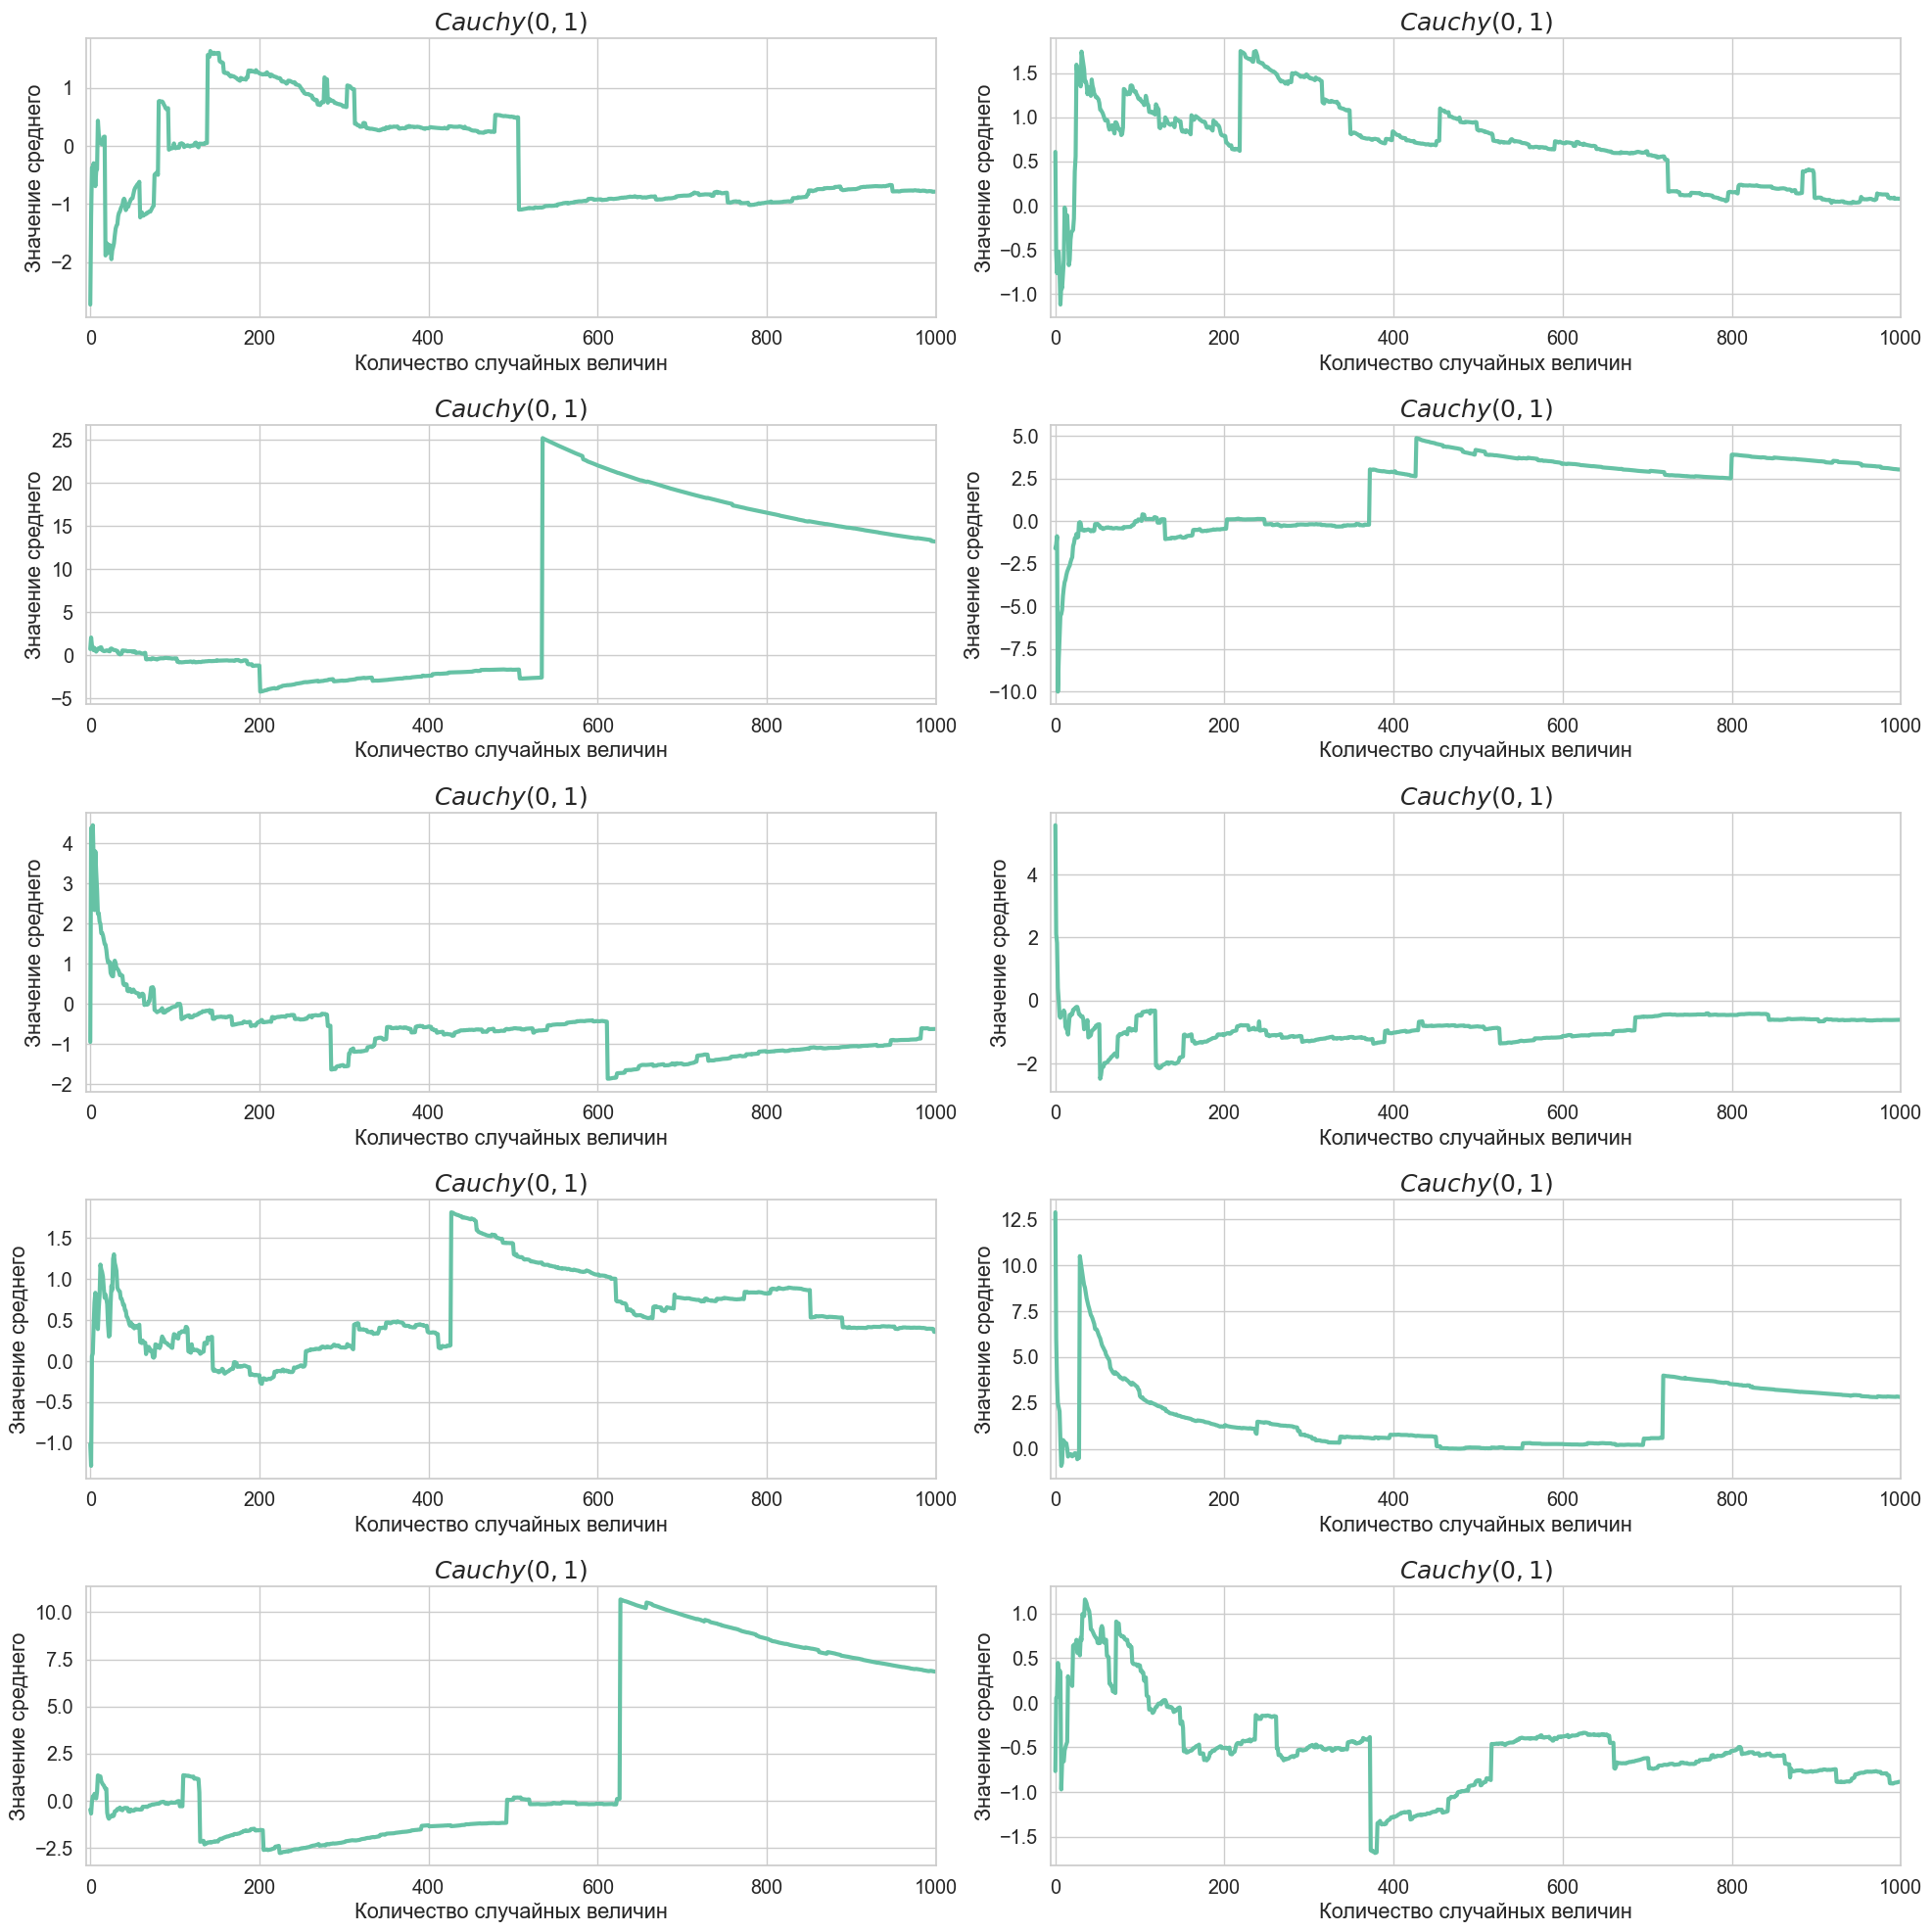

In [11]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.title('$Cauchy(0, 1)$', fontsize=18)
    
    plt.xlim((-5, size))
    
plt.tight_layout()

Теперь сгенерируем большое количество независимых наборов случайных величин.

In [12]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy(loc=0, scale=1).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

И нарисуем их всех одним цветом.

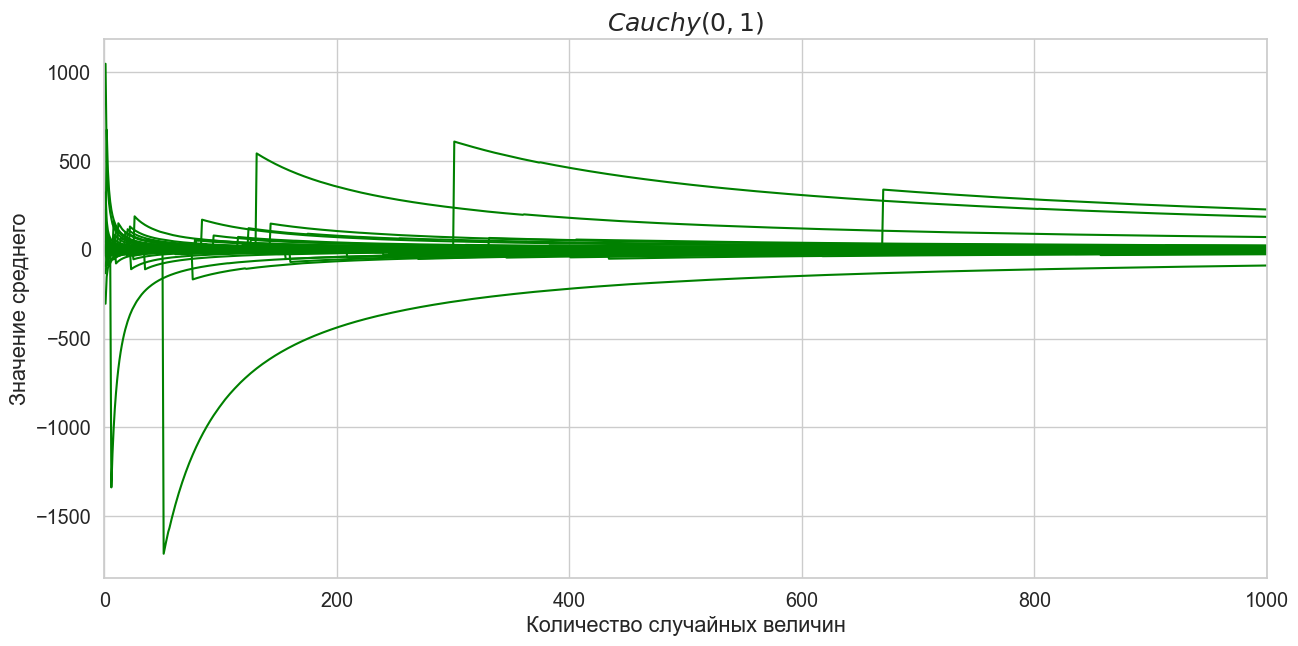

In [13]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green')

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('$Cauchy(0, 1)$', fontsize=18)


plt.xlim((0, size));

В подобных "тяжелых" графиках нужно выставлять прозрачность объектов.

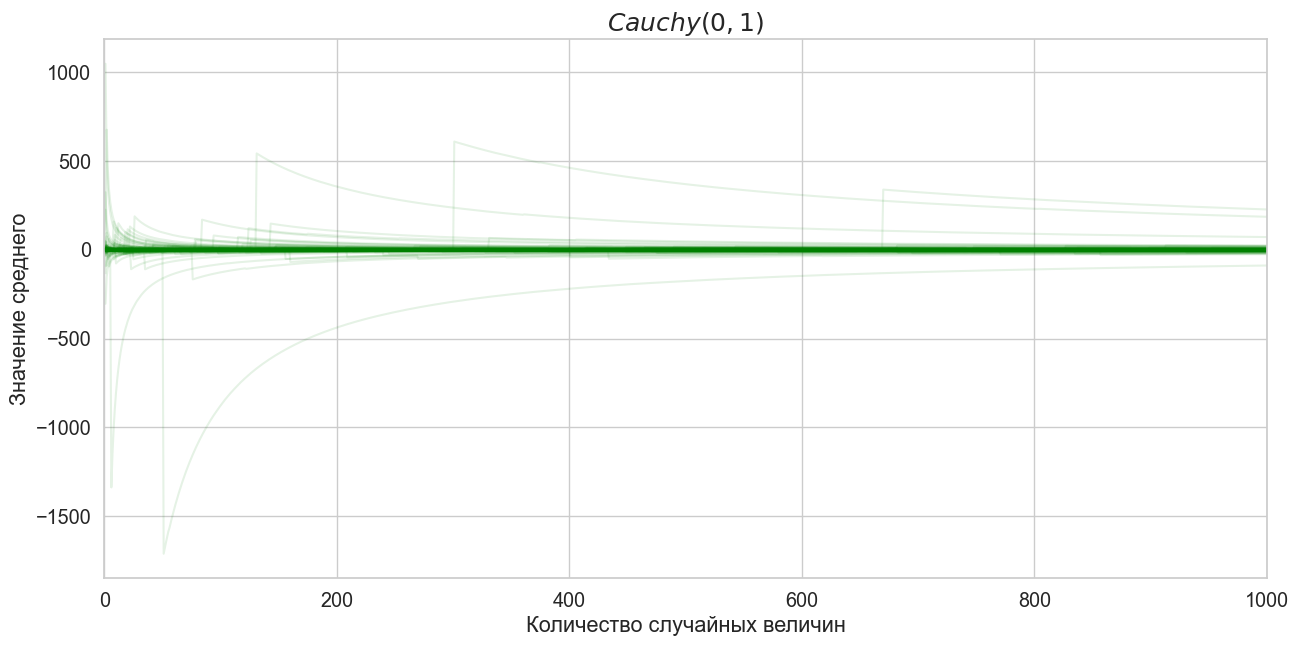

In [14]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.1)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('$Cauchy(0, 1)$', fontsize=18)


plt.xlim((0, size));

Обратим внимание на большое количество выбросов. Изменим границы графика, чтобы стало понятнее его поведение.

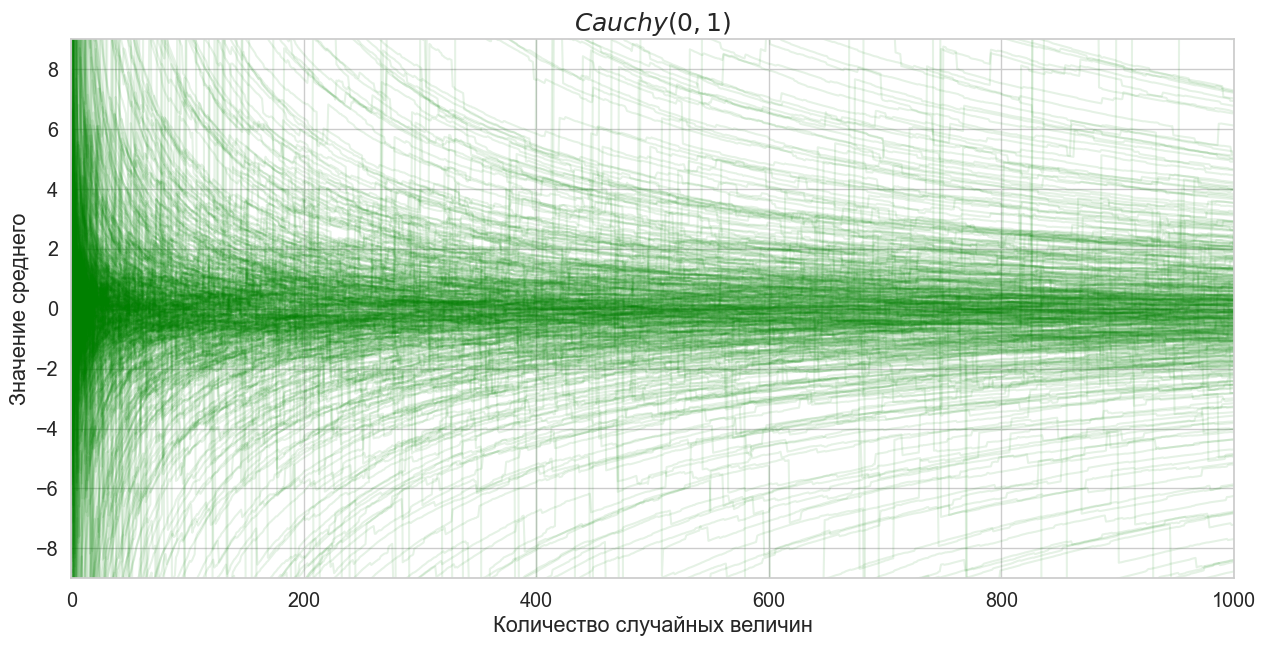

In [15]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.1)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('$Cauchy(0, 1)$', fontsize=18)

plt.ylim((-9, 9))
plt.xlim((0, size));

Хоть и количество случайных величин вблизи 0 преобладает, из графика можно понять, что среднее не стремится к 0. Так как график гуще в нуле не становится с ростом количества случайных величин.

К примеру сравним с другими распределениями, для которых выполняется ЗБЧ.

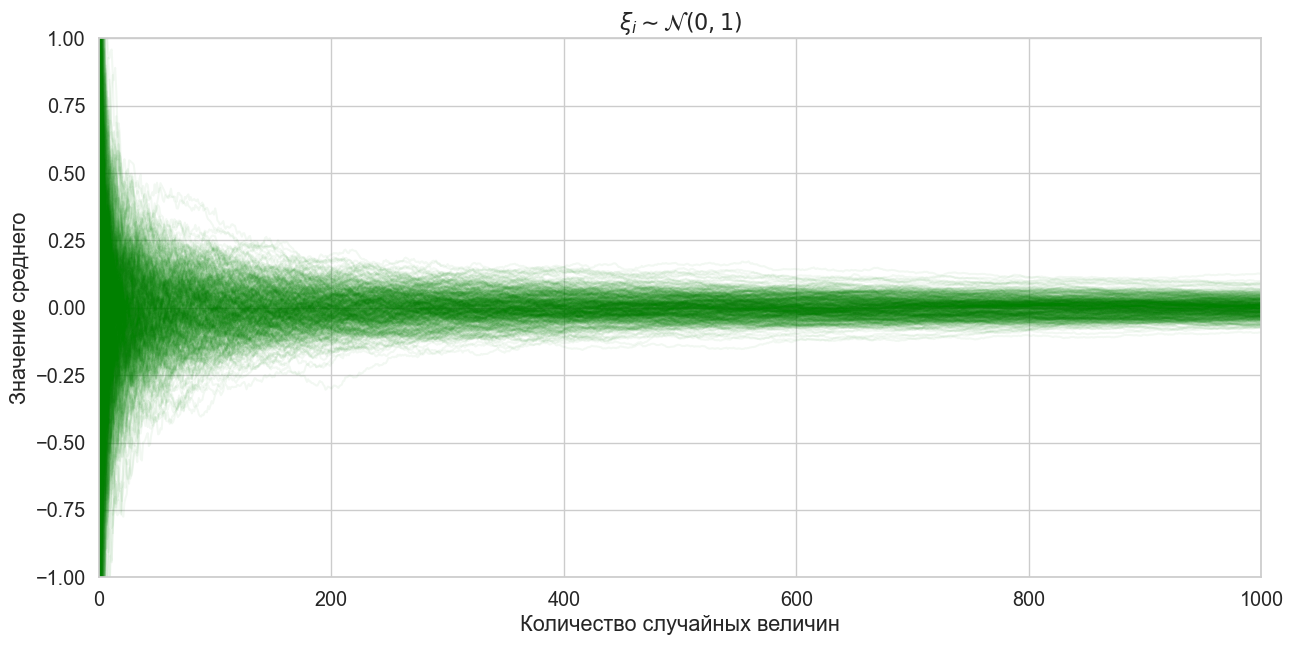

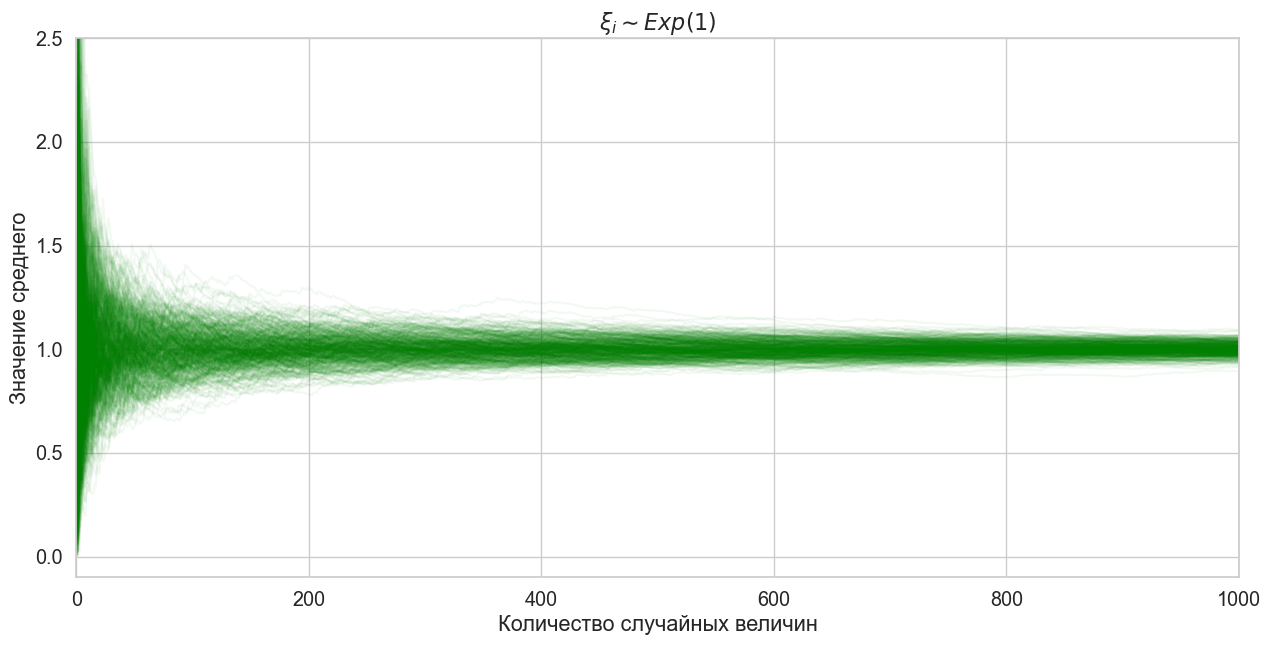

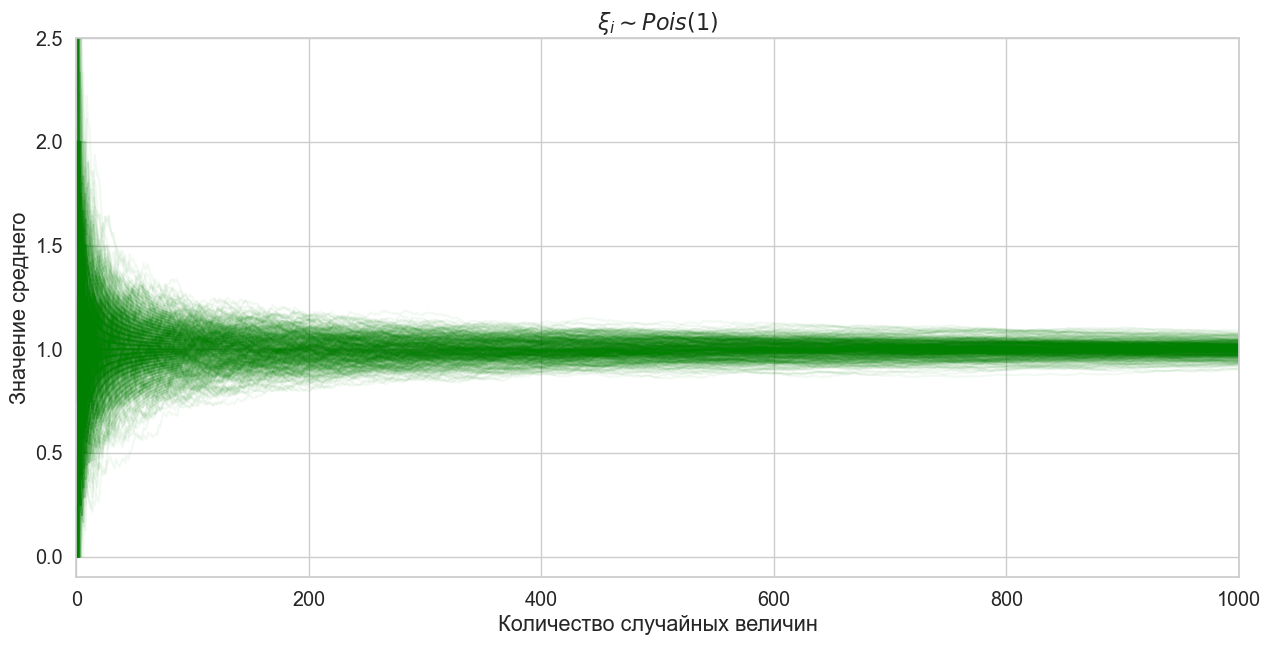

In [16]:
size = 1000
samples_count = 500

for distr, ylim, label in zip(
    [sps.norm(), sps.expon(), sps.poisson(mu=1)], 
    [(-1, 1), (-0.1, 2.5), (-0.1, 2.5)],
    ['$\\mathcal{N}(0, 1)$', '$Exp(1)$', '$Pois(1)$']
):
    
    # Генерация выборки и вычисление средних
    samples = distr.rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    # График
    plt.figure(figsize=(15, 7))
    for i in range(samples_count):
        plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.05)
    plt.title('$\\xi_i \\sim ' + label[1:], fontsize=16)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((0, size));
    plt.ylim(ylim)
    plt.show()

Разница поведения графика распределения Коши и других очевидна.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

In [17]:
size = 1000
samples_count = 500

partial_medians = []

def cum_med(x):
    partial_medians.append(x.expanding().median())

samples = sps.cauchy().rvs(size=(samples_count, size))
data = pd.DataFrame(data=samples)

# Для каждого столбца считаем медиану
data['median'] = data.apply(lambda x : cum_med(x), axis = 1)

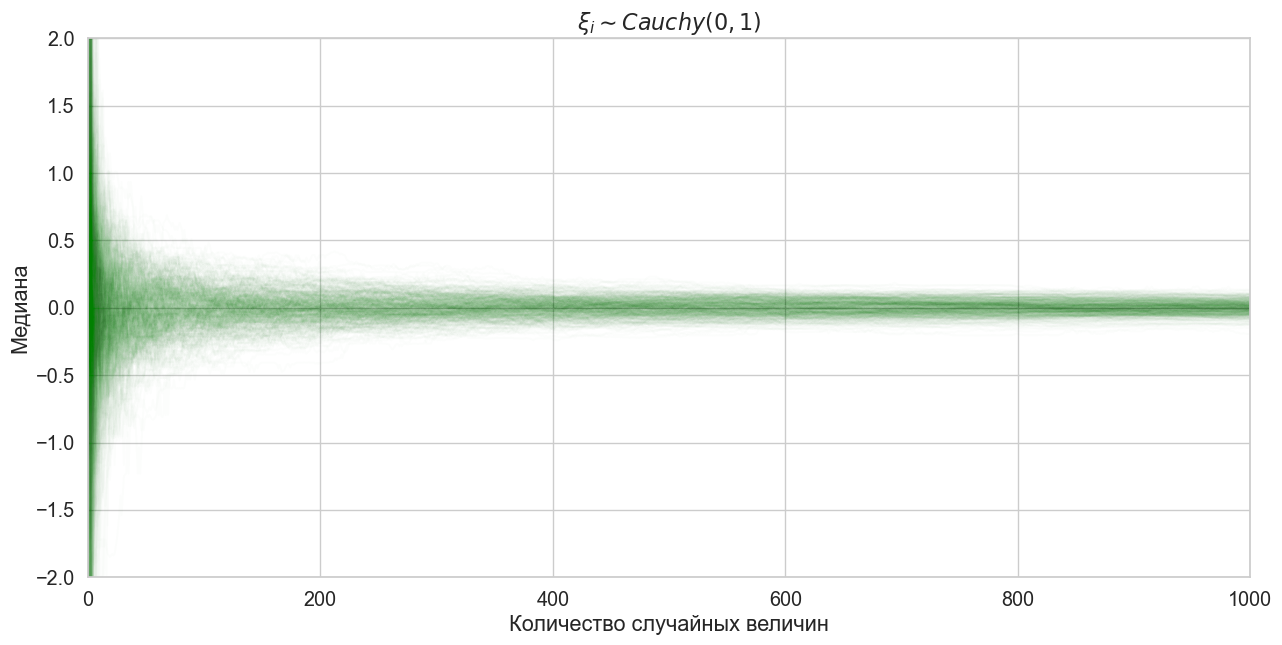

In [18]:
plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, partial_medians[i], color='green', alpha=0.01)
plt.title('$\\xi_i \\sim ' + 'Cauchy(0, 1)$', fontsize=16)
plt.xlabel('Количество случайных величин')
plt.ylabel('Медиана')
plt.xlim((0, size));
plt.ylim((-2, 2));

**Вывод:**

Таким образом, исходя из полученных графиков: ЗБЧ для распределения Коши не выполняется. При этом медиана случайных величин распределения Коши стремистя к 0.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [19]:
size = 1000
samples_count = 500

samples = sps.bernoulli(0.5).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

Найдём минимальное $n$ из условия.

In [20]:
deviation_measure = abs(cum_means - 0.5).sum(axis=0)
result = np.where(deviation_measure <= 0.02 * samples_count)
result[0][0]

345

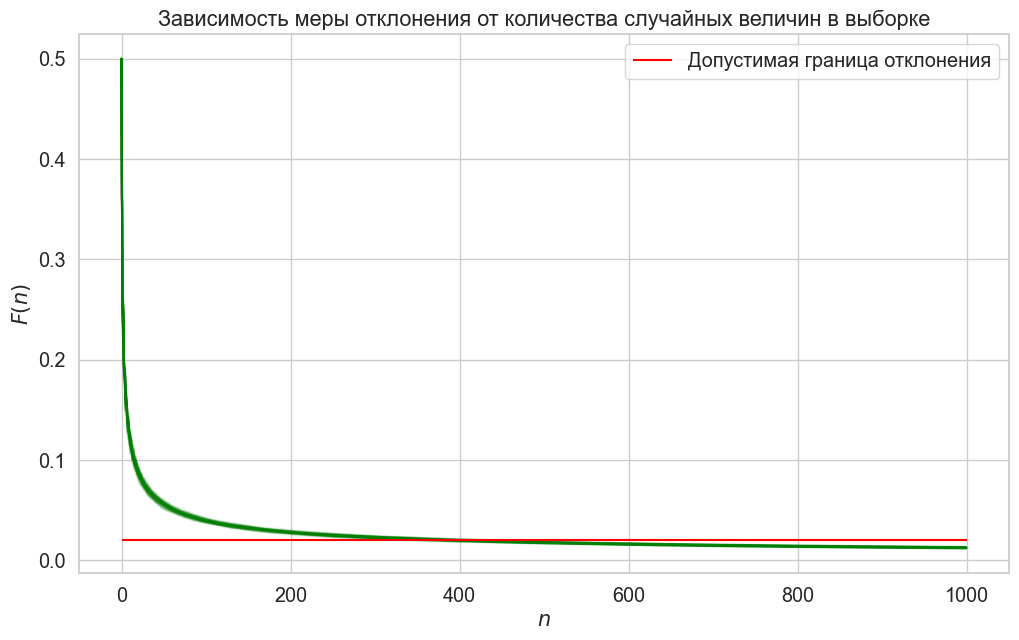

In [26]:
size = 1000
samples_count = 500

plt.figure(figsize=(12, 7))

for i in range(100):
    samples = sps.bernoulli(0.5).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
    deviation_measure = abs(cum_means - 0.5).sum(axis=0) / samples_count
    result = np.where(deviation_measure <= 0.02)
    plt.plot(np.arange(size), deviation_measure, color='green', alpha=0.05)

plt.hlines(0.02, 0, size, color='red', label='Допустимая граница отклонения')

plt.xlabel('$n$', fontsize=15)
plt.ylabel('$F(n)$', fontsize=15)
plt.title('Зависимость меры отклонения от количества случайных величин в выборке')

plt.legend()
plt.show()

Проведем 100 измерений $F(n)$ и изобразим на графике зависимость $F(n)$ от $n$.

Полученный график - гипербола. Приблизим его так, чтобы видеть отчётливее пересечение кривых.

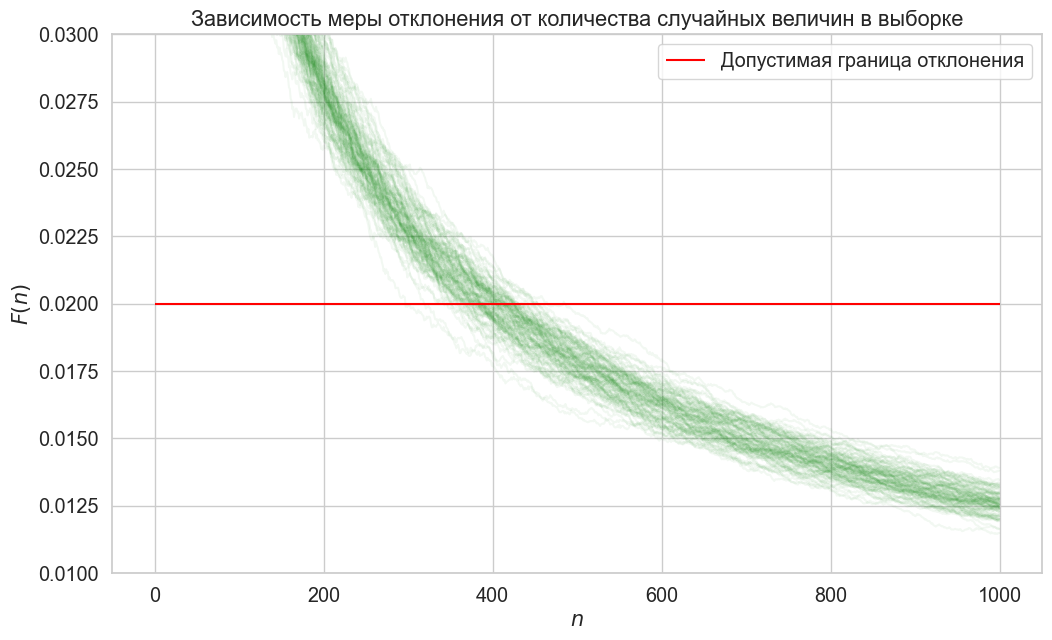

In [32]:
size = 1000
samples_count = 500

plt.figure(figsize=(12, 7))

for i in range(100):
    samples = sps.bernoulli(0.5).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
    deviation_measure = abs(cum_means - 0.5).sum(axis=0) / samples_count
    result = np.where(deviation_measure <= 0.02)
    plt.plot(np.arange(size), deviation_measure, color='green', alpha=0.05)

plt.hlines(0.02, 0, size, color='red', label='Допустимая граница отклонения')

plt.xlabel('$n$', fontsize=15)
plt.ylabel('$F(n)$', fontsize=15)
plt.title('Зависимость меры отклонения от количества случайных величин в выборке')

plt.ylim([0.01, 0.03])

plt.legend()
plt.show()

Видим, что наименьшее $n$, при котором мера отклонения допустима, находится вблизи $400$.

Теперь построим график в логарифмическом масштабе.

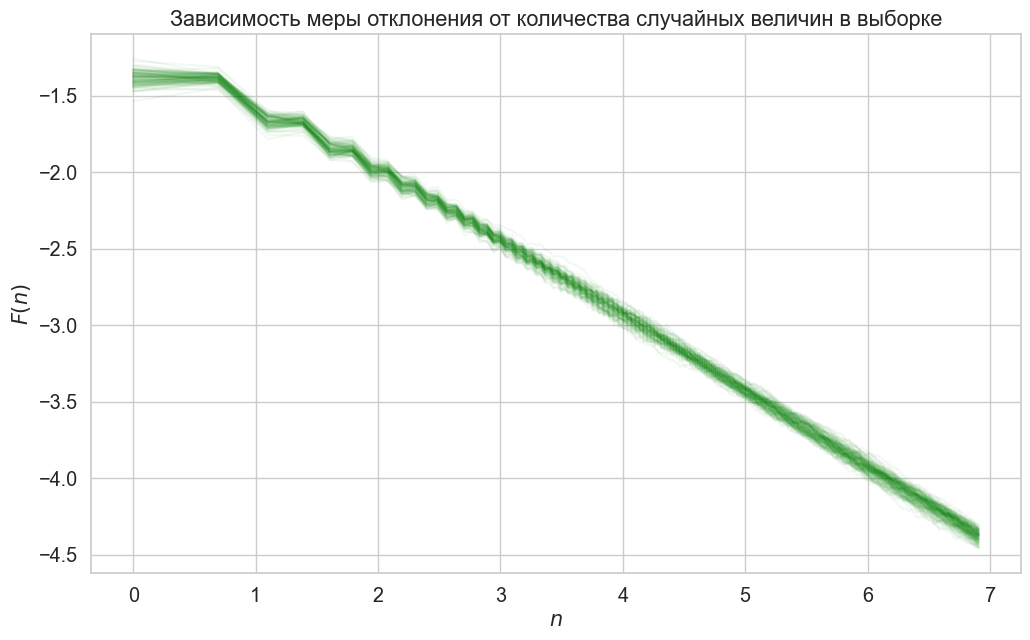

In [36]:
size = 1000
samples_count = 500

plt.figure(figsize=(12, 7))

for i in range(100):
    samples = sps.bernoulli(0.5).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
    deviation_measure = abs(cum_means - 0.5).sum(axis=0) / samples_count
    result = np.where(deviation_measure <= 0.02)
    plt.plot(np.log(np.arange(1, size)), np.log(deviation_measure[1:]), color='green', alpha=0.05)


plt.xlabel('$n$', fontsize=15)
plt.ylabel('$F(n)$', fontsize=15)
plt.title('Зависимость меры отклонения от количества случайных величин в выборке')
plt.show()

График в логарифмическом масштабе показывает, что действительно $F(n)$ обратно пропорциональна $n$.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

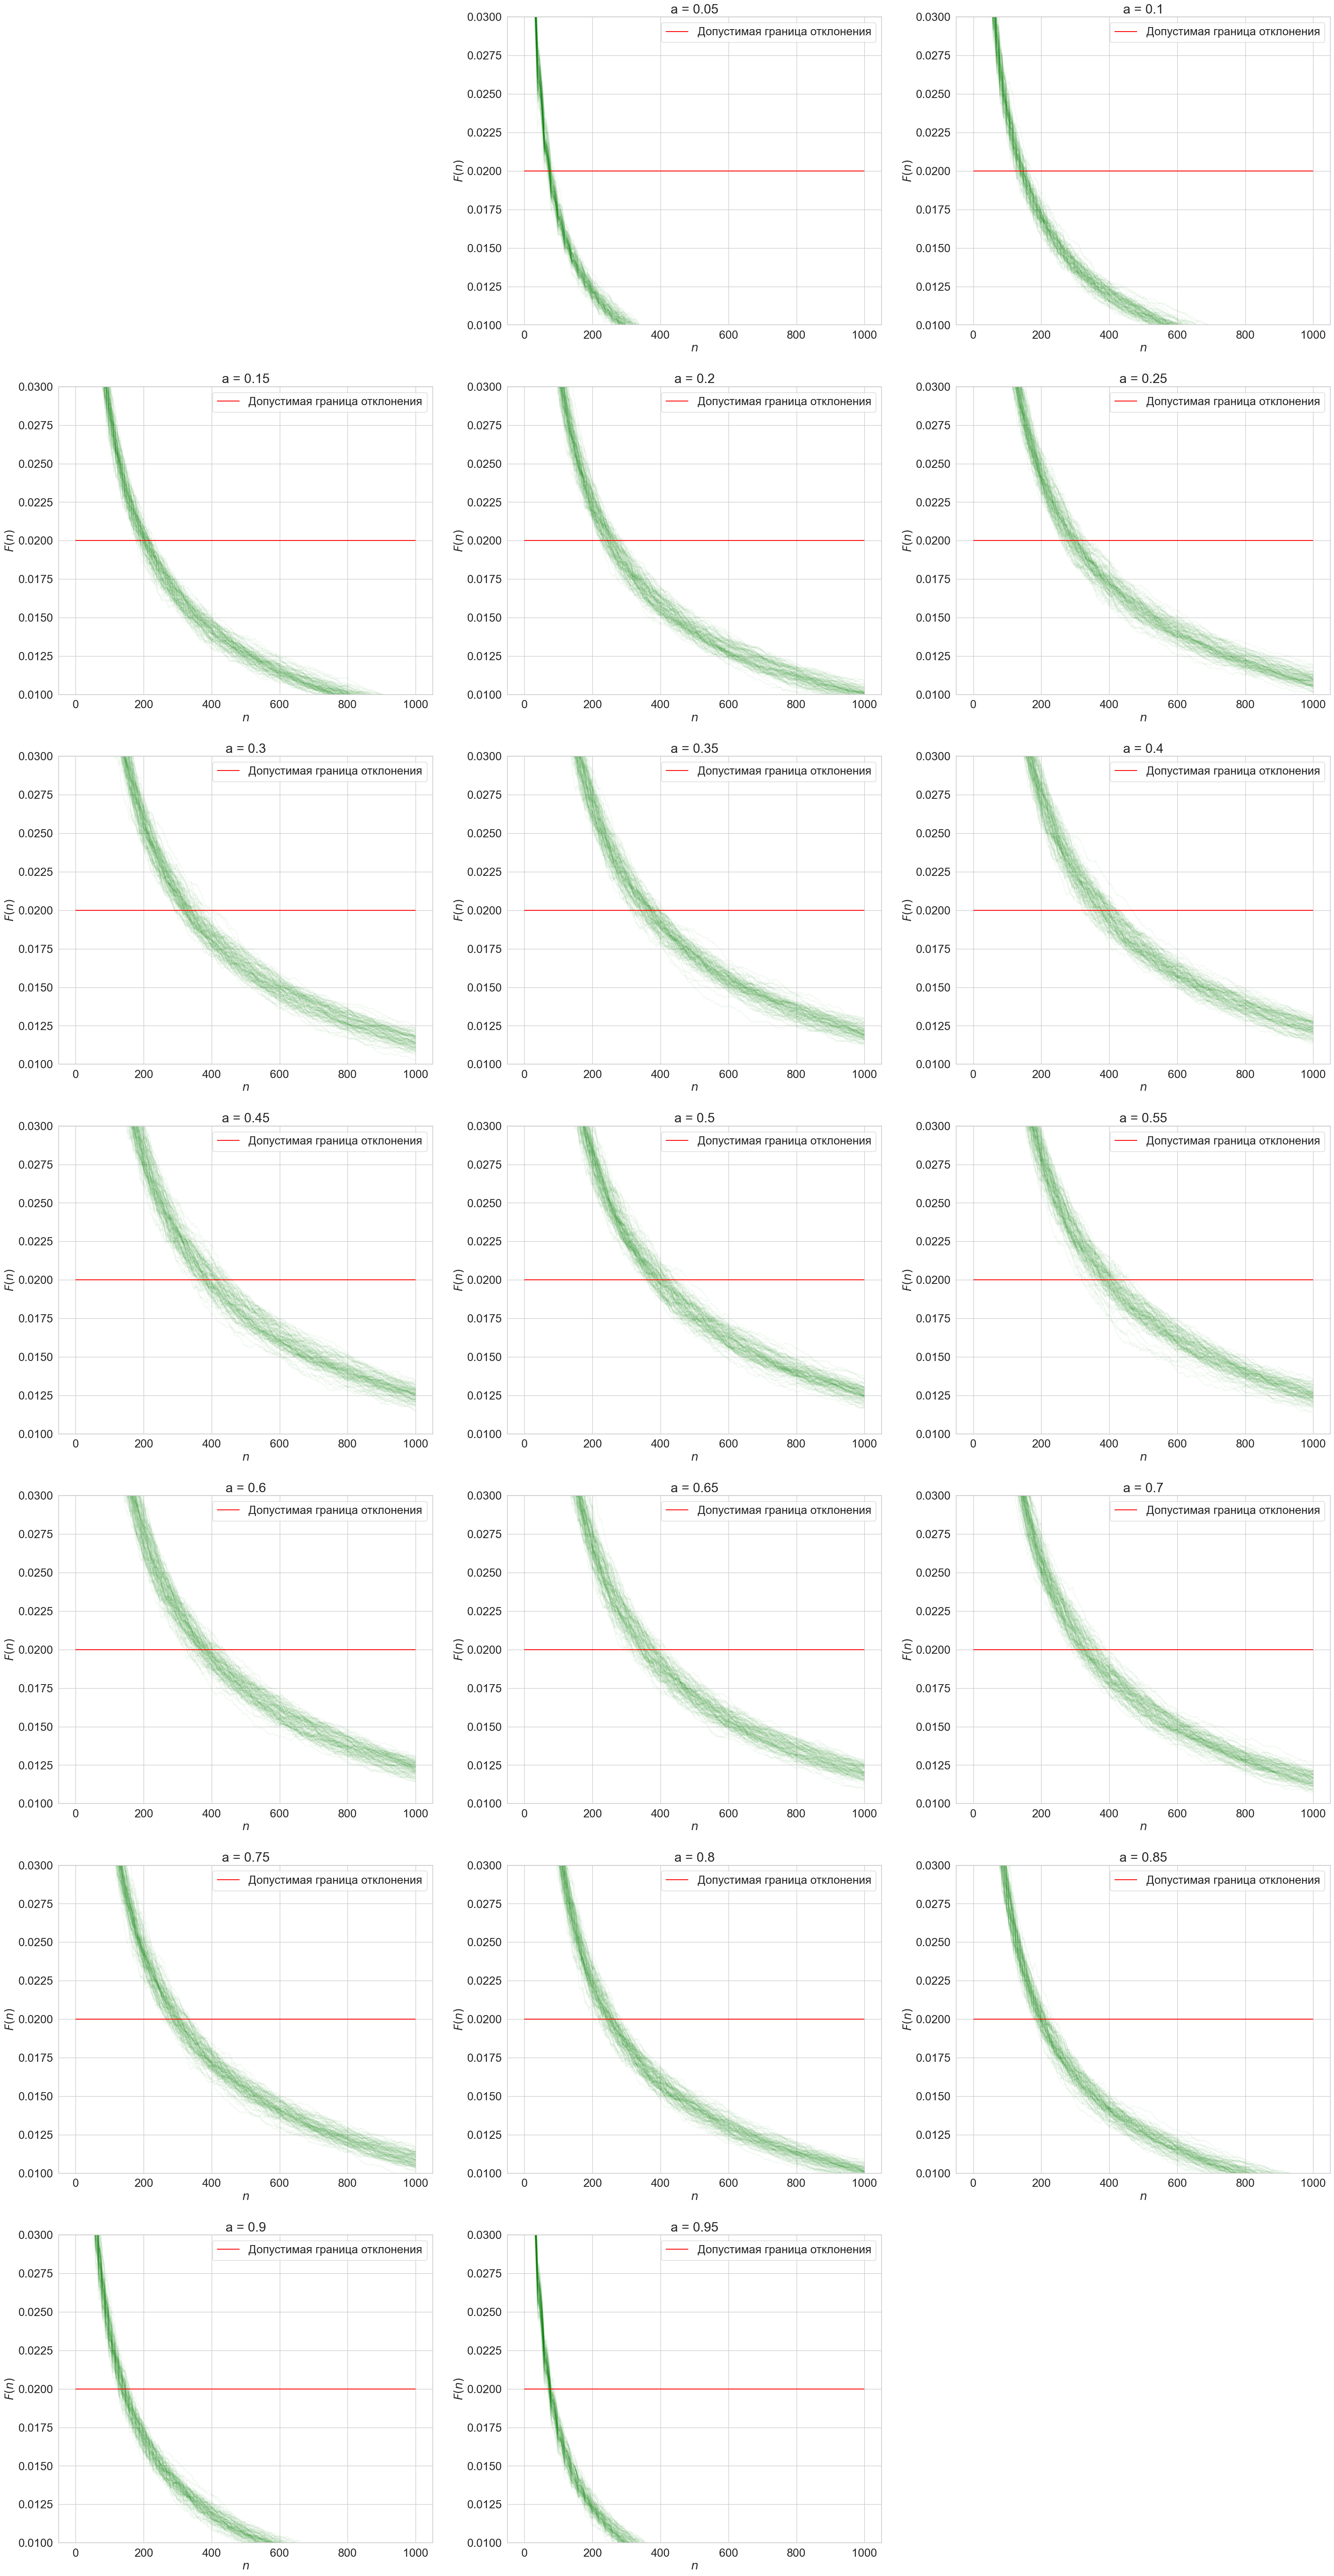

In [56]:
plt.figure(figsize=(40, 80))

for a in np.arange(0.05, 1, 0.05):
    
    size = 1000
    samples_count = 500
    plt.subplot(7, 3, int(a * 20) + 1)
    
    for i in range(100):
        samples = sps.bernoulli(a).rvs(size=(samples_count, size))
        cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
        deviation_measure = abs(cum_means - a).sum(axis=0) / samples_count
        result = np.where(deviation_measure <= 0.02)
        plt.plot(np.arange(size), deviation_measure, color='green', alpha=0.05)

    plt.hlines(0.02, 0, size, color='red', label='Допустимая граница отклонения')

    plt.xlabel('$n$', fontsize=20)
    plt.ylabel('$F(n)$', fontsize=20)
    plt.title('a = ' + str(round(a, 3)), fontsize=23)
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)

    plt.ylim([0.01, 0.03])

Заметим, что максимальное значение $n$ достигается при $a = 0.5$

Однако это надо проверить. Будем для каждого значения парметра $a$ узнавать среднее среди наименьших $n$, удовлетворяющих критерию меры отклонения.

In [73]:
func_n_min = []
for a in np.arange(0.05, 1, 0.05):
    
    size = 1000
    samples_count = 500
    
    fix_a = []
    for i in range(100):
        samples = sps.bernoulli(a).rvs(size=(samples_count, size))
        cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
        deviation_measure = abs(cum_means - a).sum(axis=0)
        result = np.where(deviation_measure <= 0.02 * samples_count)
        fix_a.append(result[0][0])
    func_n_min.append(np.sum(fix_a) / len(fix_a))

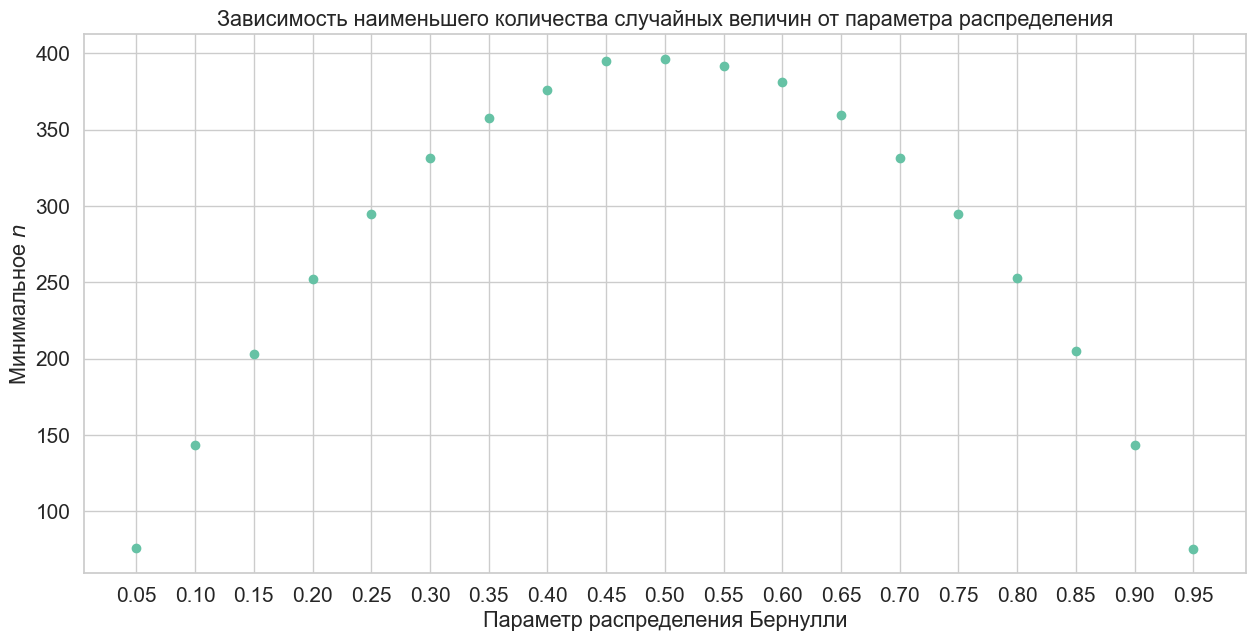

In [74]:
plt.figure(figsize=(15, 7))
plt.scatter(np.arange(0.05, 1, 0.05), func_n_min[:19])

plt.xticks(np.arange(0.05, 1, 0.05), fontsize=15);
plt.yticks(fontsize=15);

plt.title('Зависимость наименьшего количества случайных величин от параметра распределения')
plt.xlabel('Параметр распределения Бернулли');
plt.ylabel('Минимальное $n$');

**Выводы:**

Необходимо сделать около $400$ измерений, чтобы посчитать на практике среднее значение случайной величины с точностью $0.02$. При этом если взять распределение Бернулли c параметром не $0,5$, то понадобится меньше измерений для достижения такой точности. Причём график зависимости необходимого размера выборки от параметра распределения Бернулли - парабола.